In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
tk1 = pd.read_csv('../data/token_transfers.csv')

In [ ]:
CONTRACTS = {
    '0xdac17f958d2ee523a2206206994597c13d831ec7': 'USDT',
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': 'USDC', 
    '0x6b175474e89094c44da98b954eedeac495271d0f': 'DAI',
    '0x8e870d67f660d95d5be530380d0ec0bd388289e1': 'PAX',
    '0xa47c8bf37f92abed4a126bda807a7b7498661acd': 'USTC',  
    '0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9': 'WLUNA', 
}

In [9]:
tk1['contract_address'].unique()

<StringArray>
['0xdac17f958d2ee523a2206206994597c13d831ec7',
 '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
 '0xa47c8bf37f92abed4a126bda807a7b7498661acd',
 '0x6b175474e89094c44da98b954eedeac495271d0f',
 '0x8e870d67f660d95d5be530380d0ec0bd388289e1',
 '0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9']
Length: 6, dtype: str

In [10]:
tk1['datetime'] = pd.to_datetime(tk1['time_stamp'], unit='s')
# Extract date components
tk1['date'] = tk1['datetime'].dt.date
tk1['year'] = tk1['datetime'].dt.year
tk1['month'] = tk1['datetime'].dt.month
tk1['month_name'] = tk1['datetime'].dt.month_name()
tk1['day'] = tk1['datetime'].dt.day
tk1['hour'] = tk1['datetime'].dt.hour
tk1['minute'] = tk1['datetime'].dt.minute

# View results
print(tk1[['time_stamp', 'datetime', 'date', 'month', 'month_name']].head())
print(tk1[['time_stamp', 'datetime', 'date', 'month', 'month_name']].tail())

   time_stamp            datetime        date  month month_name
0  1651105815 2022-04-28 00:30:15  2022-04-28      4      April
1  1651105815 2022-04-28 00:30:15  2022-04-28      4      April
2  1651105815 2022-04-28 00:30:15  2022-04-28      4      April
3  1651105815 2022-04-28 00:30:15  2022-04-28      4      April
4  1651105815 2022-04-28 00:30:15  2022-04-28      4      April
         time_stamp            datetime        date  month month_name
5280126  1653504446 2022-05-25 18:47:26  2022-05-25      5        May
5280127  1653504446 2022-05-25 18:47:26  2022-05-25      5        May
5280128  1653504446 2022-05-25 18:47:26  2022-05-25      5        May
5280129  1653504464 2022-05-25 18:47:44  2022-05-25      5        May
5280130  1653504464 2022-05-25 18:47:44  2022-05-25      5        May


In [11]:
token1= tk1.drop(columns = ['date','year','month','month_name','day','hour','minute'])
token1.head()

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value,datetime
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,18.670000,2022-04-28 00:30:15
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,10000.000000,2022-04-28 00:30:15
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,9942.313005,2022-04-28 00:30:15
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,234.364097,2022-04-28 00:30:15
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,9800.000000,2022-04-28 00:30:15


In [12]:
token1['contract_address'] = token1['contract_address'].map(CONTRACTS)

In [13]:
token1.head()

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value,datetime
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,1651105815,USDT,18.670000,2022-04-28 00:30:15
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,10000.000000,2022-04-28 00:30:15
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,9942.313005,2022-04-28 00:30:15
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,1651105815,USDT,234.364097,2022-04-28 00:30:15
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,9800.000000,2022-04-28 00:30:15


In [14]:
token1.tail()

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value,datetime
5280126,14843502,89,0x77696bb39917c91a0c3908d577d5e322095425ca,0x0bfbaa057430e7b99448e01f99dc3442e22498c1,1653504446,WLUNA,2.465969e+05,2022-05-25 18:47:26
5280127,14843502,152,0x9f1c70a868a4517537370f47df0c902611ee2f07,0x0000000000000000000000000000000000000000,1653504446,WLUNA,8.606143e+05,2022-05-25 18:47:26
5280128,14843502,181,0x16b70f44719b227278a2dc1122e8106cc929ecd1,0xccfd63738fdf25798f3d820101fdf53126d857eb,1653504446,WLUNA,2.088362e+07,2022-05-25 18:47:26
5280129,14843503,2,0x5041ed759dd4afc3a72b8192c143f72f4724081a,0xfbd31375d09455202ad23502854d46a8092fa534,1653504464,USDT,7.570000e+02,2022-05-25 18:47:44
5280130,14843503,4,0x6a5512c32076c4d120849272adb7e4922a4ae260,0xdd39323c337c33d0285c1d4228a1a46a8502c79f,1653504464,USDC,2.500000e+02,2022-05-25 18:47:44


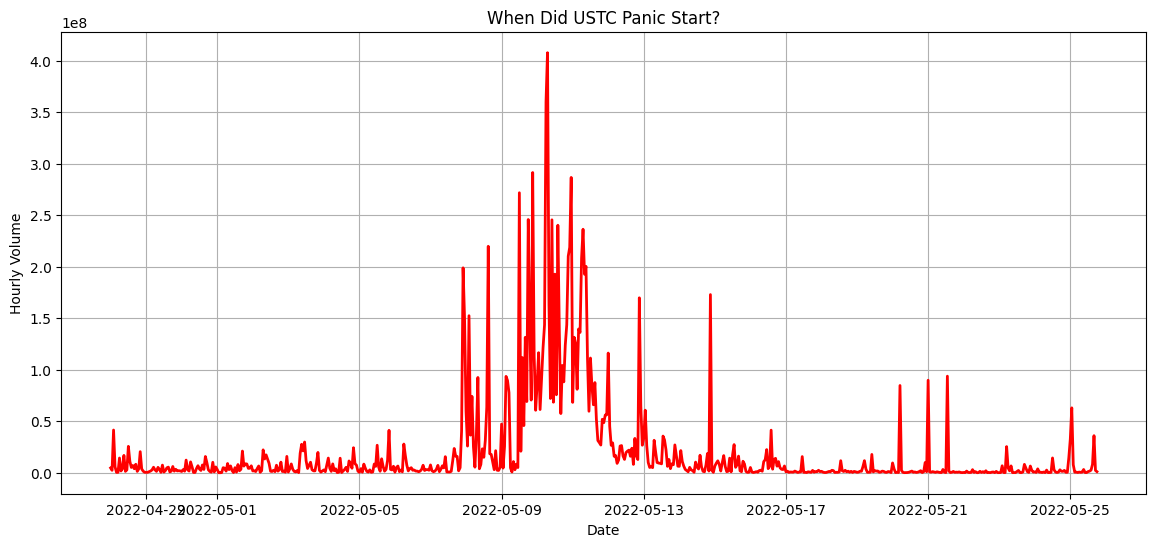

Panic peaked at: 2022-05-10 07:00:00


In [15]:
# focus on USTC
ustc = token1[token1['contract_address'] == 'USTC']

# Hourly volume
hourly = ustc.set_index('datetime').resample('h')['value'].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(hourly.index, hourly.values, linewidth=2, color='red')
plt.title('When Did USTC Panic Start?')
plt.ylabel('Hourly Volume')
plt.xlabel('Date')
plt.grid(True)
plt.savefig('q1_peg_break.png')
plt.show()

# Find the peak
peak_hour = hourly.idxmax()
print(f"Panic peaked at: {peak_hour}")

✓ Saved: wluna_analysis.png


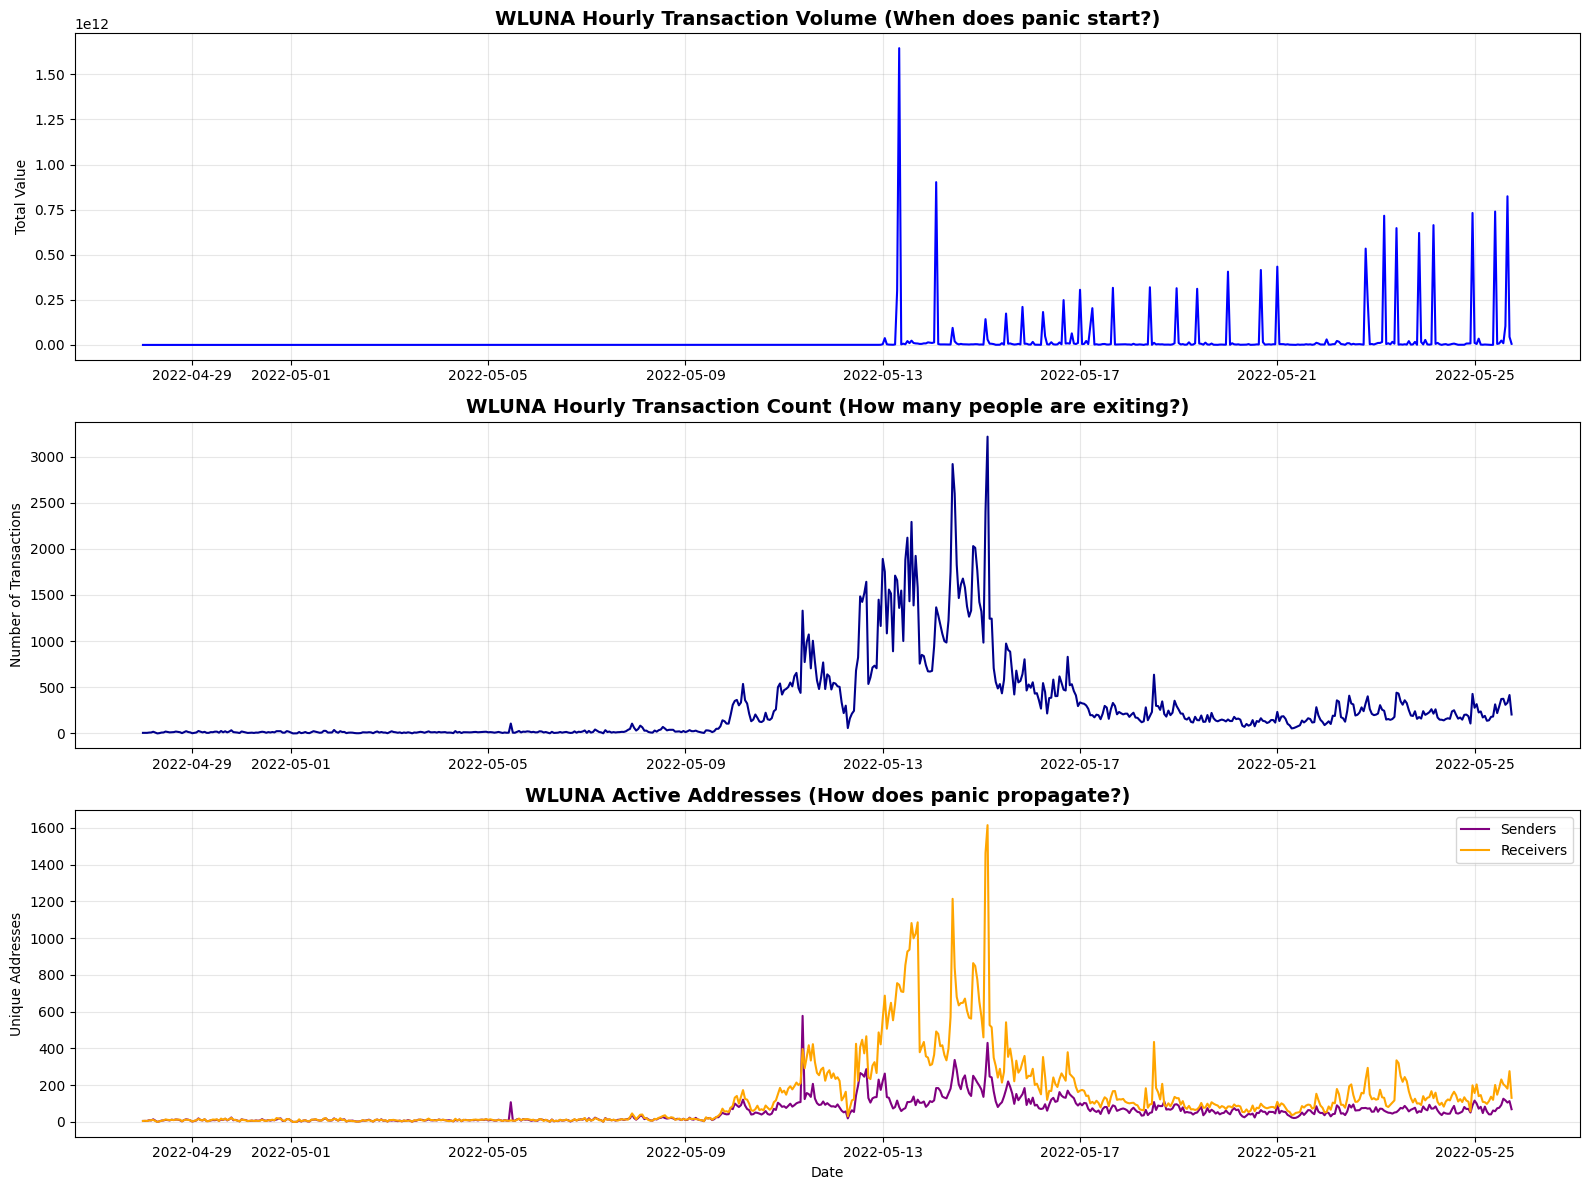


WLUNA Statistics:
Peak hour volume: 1,644,994,103,822.64
Peak hour: 2022-05-13 08:00:00
Total transactions: 190,582


In [17]:
wluna = token1[token1['contract_address'] == 'WLUNA'].copy()

wluna_hourly = wluna.set_index('datetime').resample('h').agg({
    'value': 'sum',
    'transaction_index': 'count',
    'from_address': 'nunique',
    'to_address': 'nunique'
}).rename(columns={'transaction_index': 'tx_count'})

# Create 3-panel plot
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Transaction volume
axes[0].plot(wluna_hourly.index, wluna_hourly['value'], linewidth=1.5, color='blue')
axes[0].set_title('WLUNA Hourly Transaction Volume (When does panic start?)', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Value')
axes[0].grid(True, alpha=0.3)

# Plot 2: Transaction count
axes[1].plot(wluna_hourly.index, wluna_hourly['tx_count'], linewidth=1.5, color='darkblue')
axes[1].set_title('WLUNA Hourly Transaction Count (How many people are exiting?)', 
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Transactions')
axes[1].grid(True, alpha=0.3)

# Plot 3: Active addresses
axes[2].plot(wluna_hourly.index, wluna_hourly['from_address'], 
             label='Senders', linewidth=1.5, color='purple')
axes[2].plot(wluna_hourly.index, wluna_hourly['to_address'], 
             label='Receivers', linewidth=1.5, color='orange')
axes[2].set_title('WLUNA Active Addresses (How does panic propagate?)', 
                  fontsize=14, fontweight='bold')
axes[2].set_ylabel('Unique Addresses')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('wluna_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: wluna_analysis.png")
plt.show()

# Print stats
print(f"\nWLUNA Statistics:")
print(f"Peak hour volume: {wluna_hourly['value'].max():,.2f}")
print(f"Peak hour: {wluna_hourly['value'].idxmax()}")
print(f"Total transactions: {wluna_hourly['tx_count'].sum():,}")





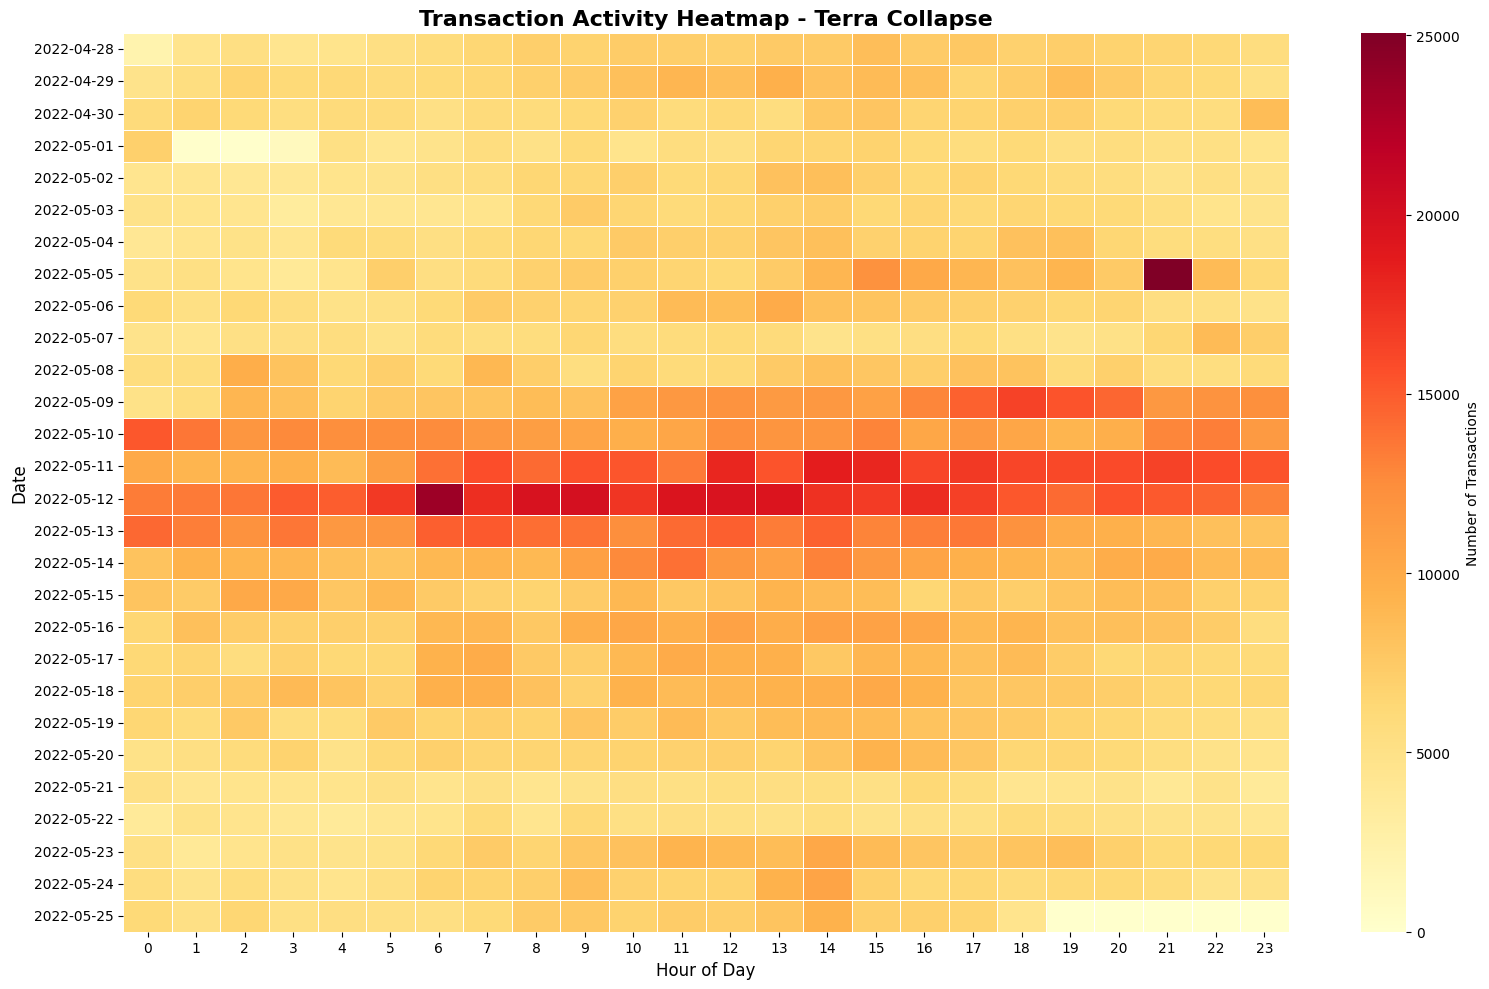

Heatmap saved as 'transaction_heatmap.png'


In [18]:
token1['datetime'] = pd.to_datetime(token1['time_stamp'], unit='s')
token1['date'] = token1['datetime'].dt.date
token1['hour'] = token1['datetime'].dt.hour

# Create pivot table: rows=dates, columns=hours, values=transaction count
pivot = token1.groupby(['date', 'hour']).size().unstack(fill_value=0)

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot, 
            cmap='YlOrRd',  # Yellow to Red
            cbar_kws={'label': 'Number of Transactions'},
            linewidths=0.5)

plt.title('Transaction Activity Heatmap - Terra Collapse', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.tight_layout()
plt.savefig('transaction_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Heatmap saved as 'transaction_heatmap.png'")





In [20]:
top_destinations = token1.groupby('to_address')['value'].sum().sort_values(ascending=False).head(20)
top_destinations

to_address
0x77696bb39917c91a0c3908d577d5e322095425ca    4.344800e+12
0x29085c5e95f6ec80984b7942e192e06a0205c025    6.767923e+11
0x0000000000000000000000000000000000000000    2.837309e+11
0x1ad15da846de6b2251c439bb13b2b6bf9d4079f9    2.656931e+11
0x8deaaaf147e16f8584251f4b1fc1dd06c21a183c    2.656931e+11
0x91b4feb1935cd3bf41adfeac2306b244137c6b9b    2.528516e+11
0x74492f1c4faee6ed843a0228a08eca63e6f40bcd    2.528516e+11
0x1c97f795e500cf99fffda27e431c1377f1e7f131    2.441309e+11
0x49179302d2d3aaf3fb391275bd44cf9e4e3d9b2d    2.441309e+11
0x9d20469f62c3ec27190f0f722b6d8997f8a15fa9    2.414591e+11
0x17b226cb67277177dc10764105503d4ce5a5c0c5    2.414591e+11
0x5f0831c0a9fea382207309586d3019b4a9519e5d    2.360514e+11
0xf9f00337868313cec59112706cb2755b4dd518ba    2.360514e+11
0xe9737b426821b3b5c70857cbe054f18ec81d8747    2.333761e+11
0xa89d373d8b94887477c59727548f15aff02bc170    2.259197e+11
0x264ac5b5ea454da1dfdc32fb8880fb6bc877d2d0    2.259197e+11
0xf3e174f7027edfb4dbd2e7b5e80bf63a4b6bba7a   

In [23]:
total_outflow = token1['value'].sum()

# Top 10 destinations capture what % of outflow?
top_10_pct = top_destinations.head(10).sum() / total_outflow * 100

print(total_outflow)
print(top_10_pct)

15183715659931.475
46.577092336693696


In [24]:
daily_flows = token1.groupby(['date', 'to_address'])['value'].sum().reset_index()

In [28]:
hourly_volume = token1.groupby(token1['datetime'].dt.floor('h')).size()

# Find spike
baseline = hourly_volume.iloc[:100].mean()  # Before crisis
peak = hourly_volume.max()
spike_ratio = peak / baseline

print(baseline)
print(peak)
print(spike_ratio)

6116.61
25054
4.096059745512629


In [37]:

# ============================================================================
# STEP 1: CATEGORIZE TRANSACTIONS BY SIZE
# ============================================================================

print("\n📊 Step 1: Categorizing transactions by size...")

# Define thresholds (adjust based on your data)
WHALE_THRESHOLD = 100000      # $100k+ = Whale
MEDIUM_THRESHOLD = 10000      # $10k-$100k = Medium investor
SMALL_THRESHOLD = 1000        # $1k-$10k = Small investor
                               # <$1k = Retail

token1['investor_type'] = pd.cut(token1['value'], 
                              bins=[0, SMALL_THRESHOLD, MEDIUM_THRESHOLD, WHALE_THRESHOLD, float('inf')],
                              labels=['Retail (<$1k)', 'Small ($1k-$10k)', 
                                     'Medium ($10k-$100k)', 'Whale (>$100k)'])

# Count by type
type_counts = token1['investor_type'].value_counts()
print("\nTransaction breakdown:")
for inv_type, count in type_counts.items():
    pct = (count / len(token1)) * 100
    print(f"  {inv_type}: {count:,} ({pct:.1f}%)")

# ============================================================================
# CHART 1: Transaction Volume by Investor Type Over Time
# ============================================================================

print("\n📈 Creating Chart 1: Transaction Volume Timeline...")

# Group by hour and investor type
hourly_by_type = token1.groupby([token1['datetime'].dt.floor('h'), 'investor_type']).size().reset_index(name='count')
hourly_by_type.columns = ['datetime', 'investor_type', 'count']

fig, ax = plt.subplots(figsize=(16, 8))

# Plot each investor type
for inv_type in ['Whale (>$100k)', 'Medium ($10k-$100k)', 'Small ($1k-$10k)', 'Retail (<$1k)']:
    data = hourly_by_type[hourly_by_type['investor_type'] == inv_type]
    ax.plot(data['datetime'], data['count'], 
            linewidth=2.5, label=inv_type, marker='o', markersize=4, alpha=0.8)

# Mark crisis period
crisis_start = token1[token1['value'] > WHALE_THRESHOLD]['datetime'].min()
ax.axvline(crisis_start, color='red', linestyle='--', linewidth=2, alpha=0.7, 
           label='First Whale Exit')

ax.set_title('Who Panicked First? Transaction Volume by Investor Type', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Date/Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('whale_vs_retail_timeline.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: whale_vs_retail_timeline.png")
plt.close()

# ============================================================================
# CHART 2: Stacked Area Chart (Shows Composition Over Time)
# ============================================================================

print("\n📈 Creating Chart 2: Stacked Area Chart...")

# Pivot for stacked area
pivot = hourly_by_type.pivot(index='datetime', columns='investor_type', values='count').fillna(0)

fig, ax = plt.subplots(figsize=(16, 8))

# Create stacked area plot
ax.stackplot(pivot.index, 
             pivot['Whale (>$100k)'], 
             pivot['Medium ($10k-$100k)'],
             pivot['Small ($1k-$10k)'],
             pivot['Retail (<$1k)'],
             labels=['Whale (>$100k)', 'Medium ($10k-$100k)', 
                    'Small ($1k-$10k)', 'Retail (<$1k)'],
             colors=['#E74C3C', '#F39C12', '#3498DB', '#95A5A6'],
             alpha=0.8)

ax.set_title('Panic Composition: Whales Led, Retail Followed', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Date/Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('whale_vs_retail_stacked.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: whale_vs_retail_stacked.png")
plt.close()

# ============================================================================
# CHART 3: Cumulative Value Transferred (Shows Who Moved Big Money First)
# ============================================================================

print("\n📈 Creating Chart 3: Cumulative Value Transferred...")

# Sort by time
df_sorted = token1.sort_values('datetime')

# Calculate cumulative sum by type
cumulative_data = []
for inv_type in ['Whale (>$100k)', 'Medium ($10k-$100k)', 'Small ($1k-$10k)', 'Retail (<$1k)']:
    type_df = df_sorted[df_sorted['investor_type'] == inv_type].copy()
    type_df['cumulative_value'] = type_df['value'].cumsum()
    cumulative_data.append(type_df[['datetime', 'cumulative_value']].assign(investor_type=inv_type))

cumulative_df = pd.concat(cumulative_data)

fig, ax = plt.subplots(figsize=(16, 8))

for inv_type, color in zip(['Whale (>$100k)', 'Medium ($10k-$100k)', 
                             'Small ($1k-$10k)', 'Retail (<$1k)'],
                            ['#E74C3C', '#F39C12', '#3498DB', '#95A5A6']):
    data = cumulative_df[cumulative_df['investor_type'] == inv_type]
    ax.plot(data['datetime'], data['cumulative_value'] / 1_000_000,  # Convert to millions
            linewidth=3, label=inv_type, color=color, alpha=0.8)

ax.set_title('Cumulative Capital Flight: Whales Moved First & Most', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Date/Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Value Transferred (Millions USD)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('whale_vs_retail_cumulative.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: whale_vs_retail_cumulative.png")
plt.close()

# ============================================================================
# CHART 4: Box Plot - Transaction Size Distribution Over Time
# ============================================================================

print("\n📈 Creating Chart 4: Transaction Size Evolution...")

# Sample dates (adjust to your crisis period)
token1['crisis_phase'] = 'Normal'
# Define crisis phases based on your data
# Example: You'll need to adjust these dates
crisis_dates = token1['date'].unique()
mid_point = len(crisis_dates) // 2

if len(crisis_dates) > 2:
    token1.loc[token1['date'].isin(crisis_dates[:mid_point]), 'crisis_phase'] = 'Pre-Crisis'
    token1.loc[token1['date'].isin(crisis_dates[mid_point:]), 'crisis_phase'] = 'During Crisis'

fig, ax = plt.subplots(figsize=(14, 8))

# Create box plot
phases = ['Pre-Crisis', 'During Crisis']
positions = [1, 2]
colors = ['#3498DB', '#E74C3C']

for phase, pos, color in zip(phases, positions, colors):
    data = token1[token1['crisis_phase'] == phase]['value']
    bp = ax.boxplot([data], positions=[pos], widths=0.6,
                     patch_artist=True,
                     boxprops=dict(facecolor=color, alpha=0.7),
                     medianprops=dict(color='black', linewidth=2),
                     showfliers=False)  # Hide outliers for clarity

ax.set_xticks(positions)
ax.set_xticklabels(phases)
ax.set_ylabel('Transaction Value (USD)', fontsize=14, fontweight='bold')
ax.set_title('Transaction Size Distribution: Pre-Crisis vs Crisis', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_yscale('log')  # Log scale to see the full range
ax.grid(True, alpha=0.3, axis='y')

# Add annotations
ax.text(1, token1[token1['crisis_phase'] == 'Pre-Crisis']['value'].median() * 2,
        f"Median: ${token1[token1['crisis_phase'] == 'Pre-Crisis']['value'].median():,.0f}",
        ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))

ax.text(2, token1[token1['crisis_phase'] == 'During Crisis']['value'].median() * 2,
        f"Median: ${token1[token1['crisis_phase'] == 'During Crisis']['value'].median():,.0f}",
        ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.savefig('whale_vs_retail_boxplot.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: whale_vs_retail_boxplot.png")
plt.close()

# ============================================================================
# STATISTICS SUMMARY
# ============================================================================

print("\n" + "=" * 60)
print("📊 KEY STATISTICS")
print("=" * 60)

# Find first mover by type
first_moves = token1.groupby('investor_type')['datetime'].min().sort_values()
print("\n🕐 First Exit by Investor Type:")
for inv_type, timestamp in first_moves.items():
    print(f"  {inv_type}: {timestamp}")

# Time gap between whale and retail
whale_first = first_moves['Whale (>$100k)']
retail_first = first_moves['Retail (<$1k)']
time_gap = (retail_first - whale_first).total_seconds() / 3600  # Convert to hours
print(f"\n⏱️  Time gap: Whales exited {time_gap:.1f} hours before retail")

# Average transaction size by type
print("\n💰 Average Transaction Size:")
avg_by_type = token1.groupby('investor_type')['value'].mean().sort_values(ascending=False)
for inv_type, avg_val in avg_by_type.items():
    print(f"  {inv_type}: ${avg_val:,.2f}")

# Total value by type
print("\n💵 Total Value Transferred:")
total_by_type = token1.groupby('investor_type')['value'].sum().sort_values(ascending=False)
for inv_type, total_val in total_by_type.items():
    pct = (total_val / token1['value'].sum()) * 100
    print(f"  {inv_type}: ${total_val:,.2f} ({pct:.1f}%)")

print("\n" + "=" * 60)
print("✅ ANALYSIS COMPLETE!")
print("=" * 60)
print("\nGenerated 4 visualizations:")
print("  1. whale_vs_retail_timeline.png - Who moved when")
print("  2. whale_vs_retail_stacked.png - Panic composition")
print("  3. whale_vs_retail_cumulative.png - Total capital flight")
print("  4. whale_vs_retail_boxplot.png - Size distribution change")
print("\n💡 KEY INSIGHT:")
print(f"   Whales exited {time_gap:.1f} hours before retail investors,")
print(f"   demonstrating information asymmetry and sophisticated timing.")
print("=" * 60)


📊 Step 1: Categorizing transactions by size...

Transaction breakdown:
  Retail (<$1k): 2,062,085 (39.1%)
  Small ($1k-$10k): 1,628,867 (30.8%)
  Medium ($10k-$100k): 1,008,708 (19.1%)
  Whale (>$100k): 577,712 (10.9%)

📈 Creating Chart 1: Transaction Volume Timeline...
  ✓ Saved: whale_vs_retail_timeline.png

📈 Creating Chart 2: Stacked Area Chart...
  ✓ Saved: whale_vs_retail_stacked.png

📈 Creating Chart 3: Cumulative Value Transferred...
  ✓ Saved: whale_vs_retail_cumulative.png

📈 Creating Chart 4: Transaction Size Evolution...
  ✓ Saved: whale_vs_retail_boxplot.png

📊 KEY STATISTICS

🕐 First Exit by Investor Type:
  Retail (<$1k): 2022-04-28 00:30:15
  Small ($1k-$10k): 2022-04-28 00:30:15
  Medium ($10k-$100k): 2022-04-28 00:30:15
  Whale (>$100k): 2022-04-28 00:30:15

⏱️  Time gap: Whales exited 0.0 hours before retail

💰 Average Transaction Size:
  Whale (>$100k): $26,206,914.52
  Medium ($10k-$100k): $36,300.44
  Small ($1k-$10k): $3,910.78
  Retail (<$1k): $329.75

💵 Total 

✅ Saved: luna_transaction_heatmap.png


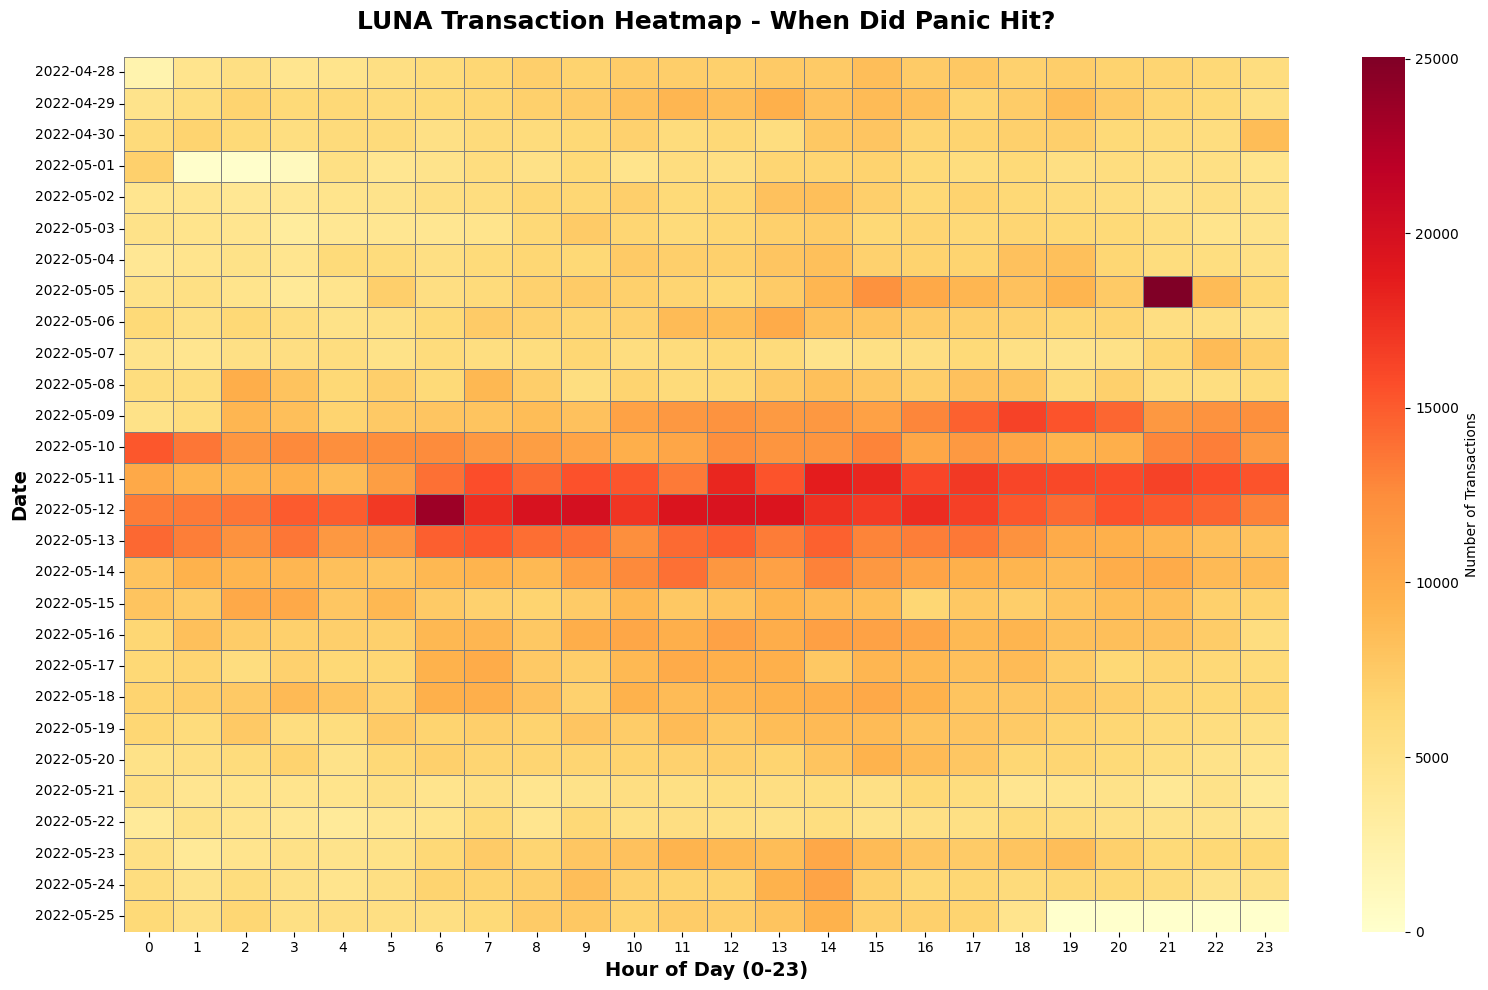


📊 Total transactions: 5,280,131
📅 Date range: 2022-04-28 to 2022-05-25
🔥 Peak hour: 14:00
🔥 Peak day: 2022-05-12


In [40]:
"""
Quick Heatmap for LUNA Transactions
Shows panic intensity by hour and day
"""

# Create pivot table: rows = dates, columns = hours, values = transaction count
pivot = token1.groupby(['date', 'hour']).size().unstack(fill_value=0)

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot, 
            cmap='YlOrRd',  # Yellow-Orange-Red
            cbar_kws={'label': 'Number of Transactions'},
            linewidths=0.5,
            linecolor='gray',
            annot=False)  # Set to True if you want numbers in cells

plt.title('LUNA Transaction Heatmap - When Did Panic Hit?', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Hour of Day (0-23)', fontsize=14, fontweight='bold')
plt.ylabel('Date', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('luna_transaction_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: luna_transaction_heatmap.png")
plt.show()

print(f"\n📊 Total transactions: {len(token1):,}")
print(f"📅 Date range: {token1['date'].min()} to {token1['date'].max()}")
print(f"🔥 Peak hour: {pivot.sum(axis=0).idxmax()}:00")
print(f"🔥 Peak day: {pivot.sum(axis=1).idxmax()}")

In [41]:

print("\n📊 Creating Heatmap 1: Total Value...")

# Create pivot table: sum of values (not count)
pivot_value = token1.groupby(['date', 'hour'])['value'].sum().unstack(fill_value=0)

# Convert to millions for readability
pivot_value_millions = pivot_value / 1_000_000

fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(pivot_value_millions, 
            cmap='YlOrRd',
            cbar_kws={'label': 'Total Value (Millions USD)'},
            linewidths=0.3,
            linecolor='white',
            ax=ax,
            fmt='.1f')

ax.set_title('Capital Flight Heatmap - Total Value Transferred by Hour', 
             fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Hour of Day (UTC)', fontsize=14, fontweight='bold')
ax.set_ylabel('Date', fontsize=14, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig('luna_value_heatmap_total.png', dpi=300, bbox_inches='tight')
print("  ✅ Saved: luna_value_heatmap_total.png")
plt.close()

# ============================================================================
# HEATMAP 2: Average Transaction Size (Shows Whale Activity)
# ============================================================================

print("\n📊 Creating Heatmap 2: Average Transaction Size...")

# Calculate average transaction size per hour
pivot_avg = token1.groupby(['date', 'hour'])['value'].mean().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(pivot_avg, 
            cmap='RdYlGn_r',  # Red = large, Green = small
            cbar_kws={'label': 'Average Transaction Size (USD)'},
            linewidths=0.3,
            linecolor='white',
            ax=ax,
            fmt='.0f')

ax.set_title('Whale Detection Heatmap - Average Transaction Size by Hour', 
             fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Hour of Day (UTC)', fontsize=14, fontweight='bold')
ax.set_ylabel('Date', fontsize=14, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig('luna_value_heatmap_average.png', dpi=300, bbox_inches='tight')
print("  ✅ Saved: luna_value_heatmap_average.png")
plt.close()

# ============================================================================
# HEATMAP 3: Crisis Week - Dual View (Count vs Value)
# ============================================================================

print("\n📊 Creating Heatmap 3: Crisis Week Comparison...")

# Filter to crisis week
crisis_start = pd.Timestamp('2022-05-05').date()
crisis_end = pd.Timestamp('2022-05-15').date()

crisis_df = token1[(token1['date'] >= crisis_start) & (token1['date'] <= crisis_end)]

# Create pivots
crisis_count = crisis_df.groupby(['date', 'hour']).size().unstack(fill_value=0)
crisis_value = crisis_df.groupby(['date', 'hour'])['value'].sum().unstack(fill_value=0) / 1_000_000

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left: Transaction count
sns.heatmap(crisis_count, 
            cmap='Blues',
            cbar_kws={'label': 'Transaction Count'},
            linewidths=0.5,
            linecolor='black',
            ax=ax1,
            annot=True,
            fmt='g',
            annot_kws={'fontsize': 7})

ax1.set_title('Transaction COUNT\n(Activity Volume)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Date', fontsize=12)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=9)

# Right: Transaction value
sns.heatmap(crisis_value, 
            cmap='Reds',
            cbar_kws={'label': 'Value (Millions USD)'},
            linewidths=0.5,
            linecolor='black',
            ax=ax2,
            annot=True,
            fmt='.1f',
            annot_kws={'fontsize': 7})

ax2.set_title('Transaction VALUE\n(Capital Flight)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Date', fontsize=12)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=9)

fig.suptitle('Crisis Week: Activity vs Capital - Different Stories', 
             fontsize=20, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig('luna_value_heatmap_comparison.png', dpi=300, bbox_inches='tight')
print("  ✅ Saved: luna_value_heatmap_comparison.png")
plt.close()

# ============================================================================
# HEATMAP 4: Large Transaction Heatmap (Whales Only)
# ============================================================================

print("\n📊 Creating Heatmap 4: Whale Transactions Only...")

# Filter for large transactions (>$100k)
WHALE_THRESHOLD = 100000
whales_df = token1[token1['value'] > WHALE_THRESHOLD]

if len(whales_df) > 0:
    pivot_whales = whales_df.groupby(['date', 'hour']).size().unstack(fill_value=0)
    
    fig, ax = plt.subplots(figsize=(16, 12))
    
    sns.heatmap(pivot_whales, 
                cmap='Reds',
                cbar_kws={'label': 'Number of Whale Transactions (>$100k)'},
                linewidths=0.3,
                linecolor='white',
                ax=ax)
    
    ax.set_title('Whale Activity Heatmap - Large Transactions Only (>$100k)', 
                 fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('Hour of Day (UTC)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Date', fontsize=14, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
    
    plt.tight_layout()
    plt.savefig('luna_value_heatmap_whales.png', dpi=300, bbox_inches='tight')
    print("  ✅ Saved: luna_value_heatmap_whales.png")
    plt.close()
else:
    print("  ⚠️  No whale transactions found (adjust threshold)")

# ============================================================================
# Statistics
# ============================================================================

print("\n" + "="*70)
print("📊 VALUE HEATMAP STATISTICS")
print("="*70)

# Find when most VALUE moved (not most transactions)
peak_value_day = pivot_value.sum(axis=1).idxmax()
peak_value_hour = pivot_value.sum(axis=0).idxmax()
peak_value_single = pivot_value.max().max()

print(f"\n💰 Peak VALUE Movement:")
print(f"   Day with most capital: {peak_value_day}")
print(f"   Hour with most capital: {peak_value_hour}:00 UTC")
print(f"   Largest single hour: ${peak_value_single:,.0f}")

# Compare to transaction count peaks
pivot_count = token1.groupby(['date', 'hour']).size().unstack(fill_value=0)
peak_count_day = pivot_count.sum(axis=1).idxmax()
peak_count_hour = pivot_count.sum(axis=0).idxmax()

print(f"\n📊 Comparison (Value Peak vs Count Peak):")
print(f"   Peak VALUE day: {peak_value_day}")
print(f"   Peak COUNT day: {peak_count_day}")
if peak_value_day != peak_count_day:
    print(f"   ⚠️  DIFFERENT DAYS! This suggests whale timing differs from retail")
else:
    print(f"   ✓ Same day (mass panic across all investor types)")

print(f"\n   Peak VALUE hour: {peak_value_hour}:00")
print(f"   Peak COUNT hour: {peak_count_hour}:00")
if peak_value_hour != peak_count_hour:
    print(f"   ⚠️  DIFFERENT HOURS! Whales moved at different time than retail")
else:
    print(f"   ✓ Same hour (synchronized panic)")

# Calculate average transaction size over time
avg_size = token1.groupby('date')['value'].mean()
pre_crisis_avg = avg_size[avg_size.index < crisis_start].mean()
crisis_avg = avg_size[(avg_size.index >= crisis_start) & (avg_size.index <= crisis_end)].mean()

print(f"\n💵 Average Transaction Size:")
print(f"   Pre-crisis: ${pre_crisis_avg:,.0f}")
print(f"   During crisis: ${crisis_avg:,.0f}")
print(f"   Change: {((crisis_avg - pre_crisis_avg) / pre_crisis_avg * 100):+.1f}%")

if crisis_avg > pre_crisis_avg:
    print(f"   💡 INSIGHT: Larger transactions during crisis = Whales exited")
else:
    print(f"   💡 INSIGHT: Smaller transactions during crisis = Retail panic")

# Value concentration
total_value = token1['value'].sum()
top_1pct_threshold = token1['value'].quantile(0.99)
top_1pct_value = token1[token1['value'] >= top_1pct_threshold]['value'].sum()
top_1pct_concentration = (top_1pct_value / total_value) * 100

print(f"\n🎯 Value Concentration:")
print(f"   Top 1% of transactions: ${top_1pct_value:,.0f}")
print(f"   Percentage of total value: {top_1pct_concentration:.1f}%")
print(f"   💡 INSIGHT: Top 1% of transactions moved {top_1pct_concentration:.0f}% of capital")

print("\n" + "="*70)
print("✅ ALL VALUE HEATMAPS CREATED!")
print("="*70)
print("\n📊 Files saved:")
print("   1. luna_value_heatmap_total.png - Total capital moved")
print("   2. luna_value_heatmap_average.png - Avg transaction size (whale detector)")
print("   3. luna_value_heatmap_comparison.png - Count vs Value side-by-side ⭐")
print("   4. luna_value_heatmap_whales.png - Whale transactions only")
print("\n💡 USE #3 (comparison) for your slide - shows both stories!")
print("="*70)


📊 Creating Heatmap 1: Total Value...
  ✅ Saved: luna_value_heatmap_total.png

📊 Creating Heatmap 2: Average Transaction Size...
  ✅ Saved: luna_value_heatmap_average.png

📊 Creating Heatmap 3: Crisis Week Comparison...
  ✅ Saved: luna_value_heatmap_comparison.png

📊 Creating Heatmap 4: Whale Transactions Only...
  ✅ Saved: luna_value_heatmap_whales.png

📊 VALUE HEATMAP STATISTICS

💰 Peak VALUE Movement:
   Day with most capital: 2022-05-13
   Hour with most capital: 16:00 UTC
   Largest single hour: $1,647,611,446,179

📊 Comparison (Value Peak vs Count Peak):
   Peak VALUE day: 2022-05-13
   Peak COUNT day: 2022-05-12
   ⚠️  DIFFERENT DAYS! This suggests whale timing differs from retail

   Peak VALUE hour: 16:00
   Peak COUNT hour: 14:00
   ⚠️  DIFFERENT HOURS! Whales moved at different time than retail

💵 Average Transaction Size:
   Pre-crisis: $96,408
   During crisis: $1,513,143
   Change: +1469.5%
   💡 INSIGHT: Larger transactions during crisis = Whales exited

🎯 Value Concentra

Loading data...
Loaded 5,277,372 transactions
Date range: 2022-04-28 00:30:15 to 2022-05-25 18:47:44

✓ Heatmap saved as: luna_transaction_heatmap_complete.png

SUMMARY STATISTICS
Total transactions: 5,277,372
Total value: 15,183,715,659,931.47
Average value: 2,877,135.75
Median value: 2,143.52
Max single transaction: 676,792,330,236.96
Peak day (by volume): 2022-05-13
Peak hour (by volume): 16:00


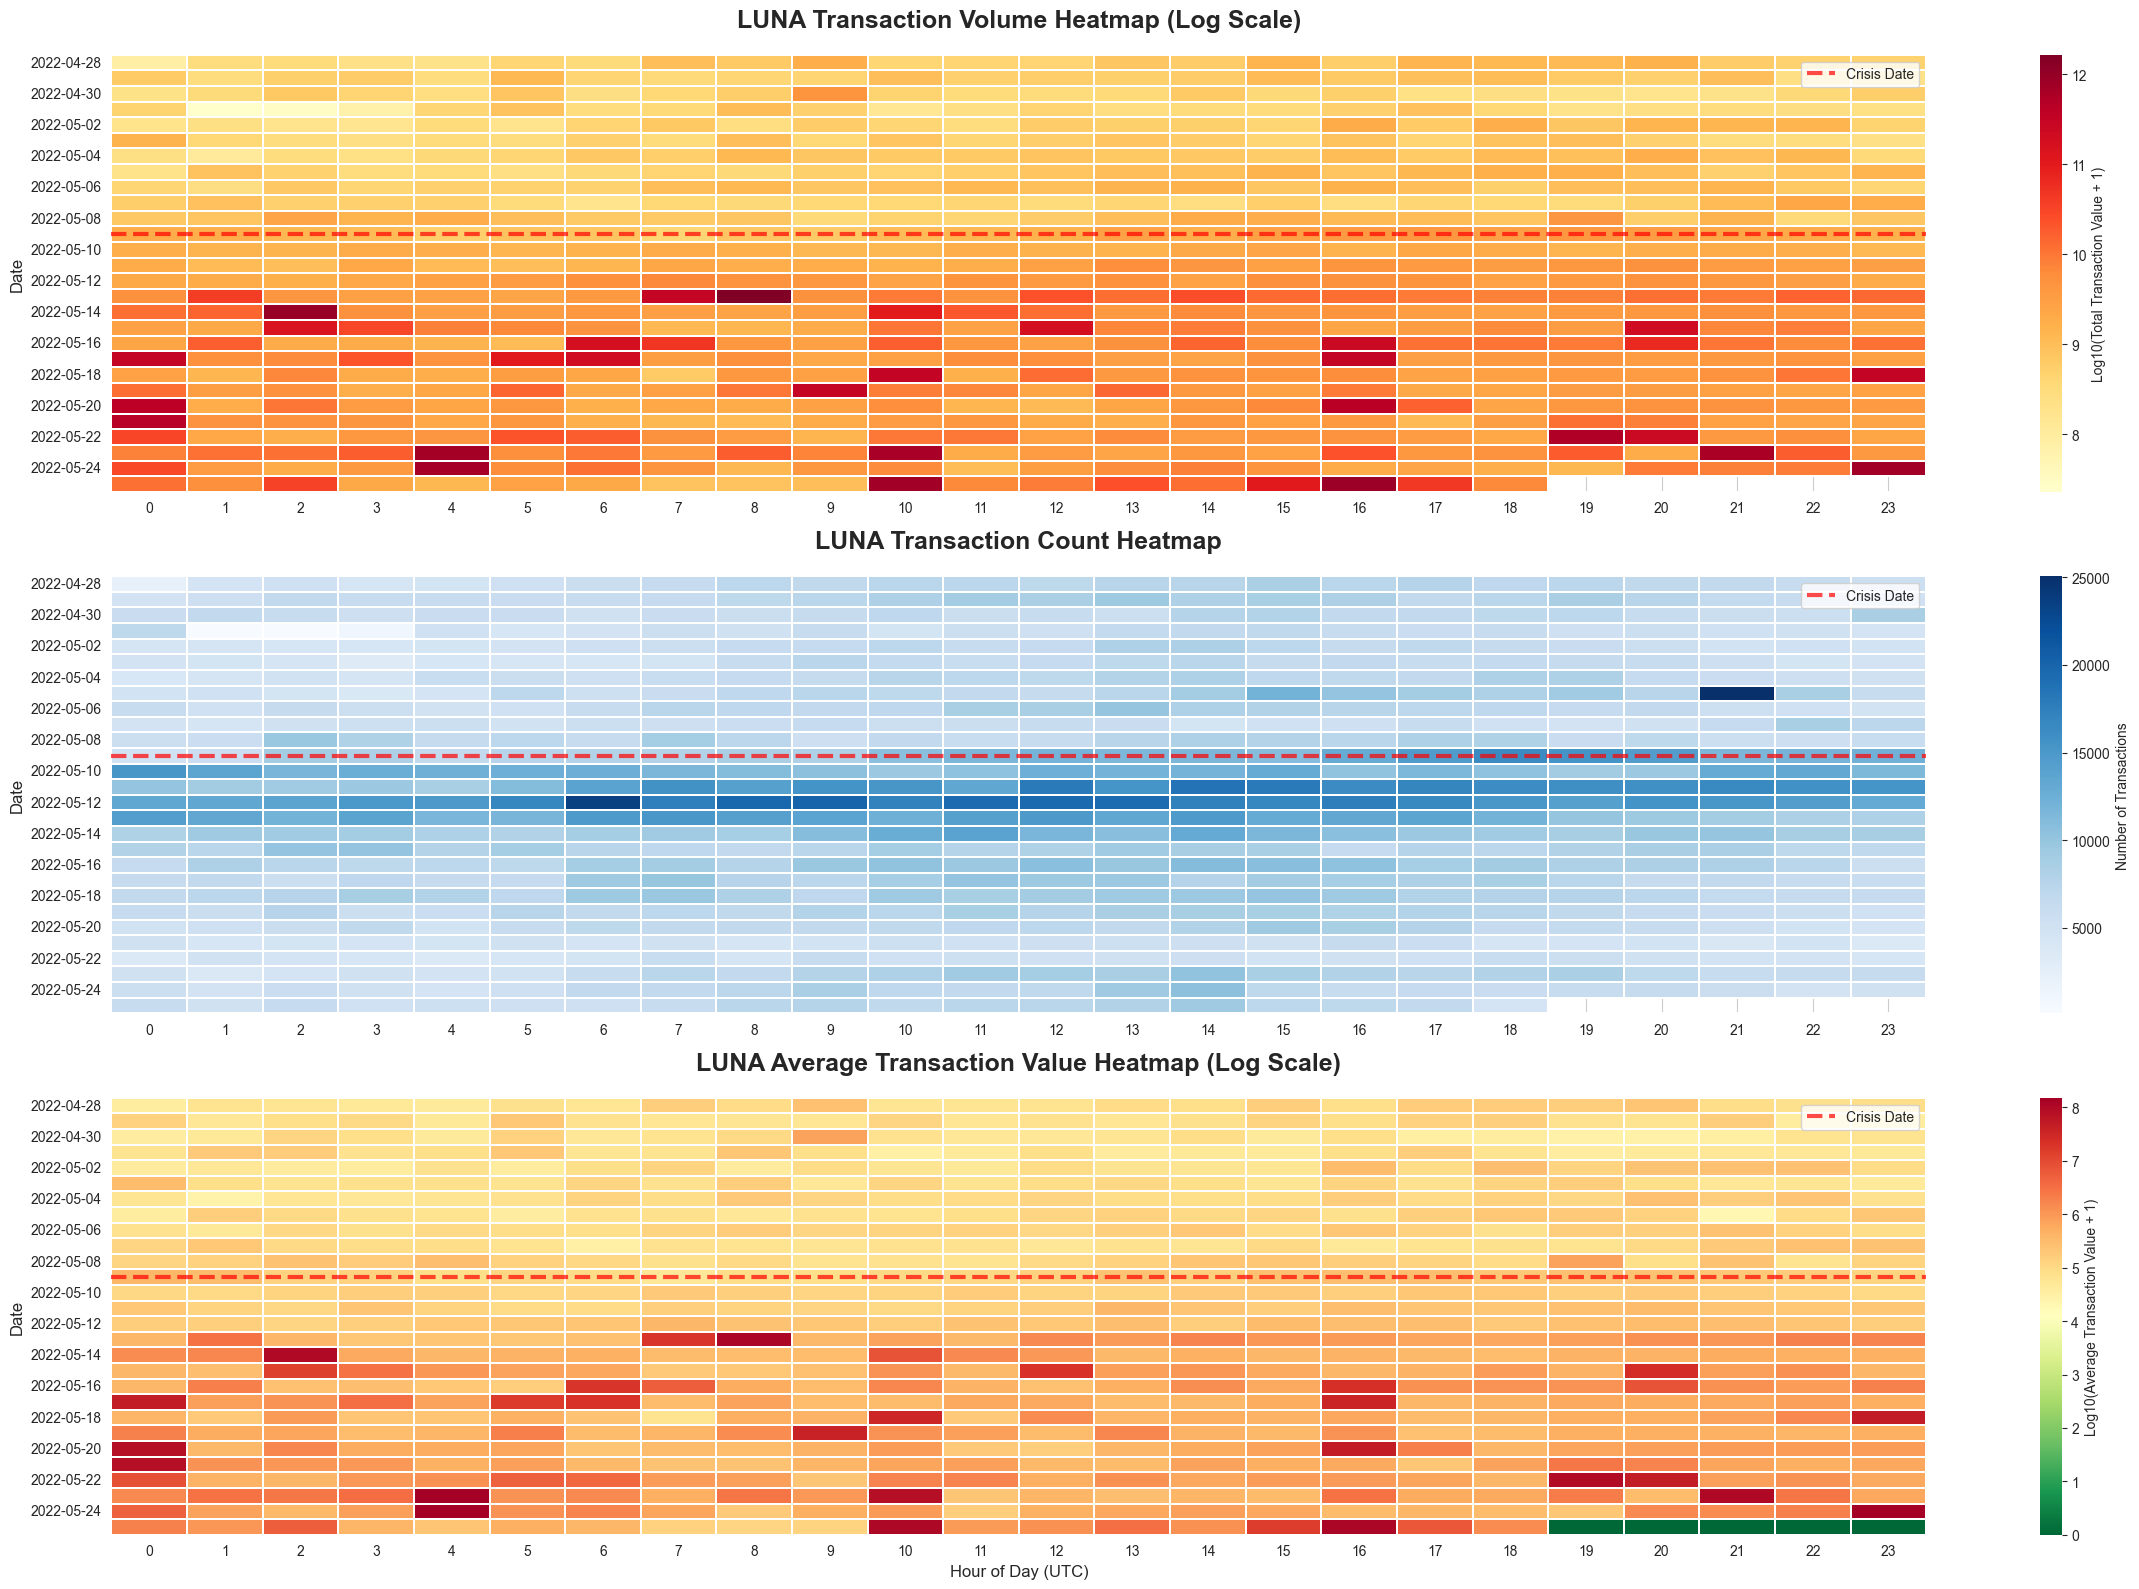


Done! Check the generated PNG file.


In [43]:


# ============================================================================
# CONFIGURATION - UPDATE THIS!
# ============================================================================
DATA_FILE = '../data/token_transfers.csv'  # <-- PUT YOUR FILE NAME HERE
CRISIS_DATE = '2022-05-09'  # Terra-Luna collapse date
# ============================================================================

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Load data
print("Loading data...")
df = pd.read_csv(DATA_FILE)

# Prepare data
df['datetime'] = pd.to_datetime(df['time_stamp'], unit='s')
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df = df[df['value'] > 0].copy()
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour

print(f"Loaded {len(df):,} transactions")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

# Aggregate by date and hour
heatmap_data = df.groupby(['date', 'hour'])['value'].agg(['sum', 'count']).reset_index()

# Create pivot tables
pivot_sum = heatmap_data.pivot(index='date', columns='hour', values='sum')
pivot_count = heatmap_data.pivot(index='date', columns='hour', values='count')

# Create the main visualization
fig = plt.figure(figsize=(24, 16))

# Subplot 1: Total transaction value (log scale)
ax1 = plt.subplot(3, 1, 1)
sns.heatmap(np.log10(pivot_sum + 1), 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Log10(Total Transaction Value + 1)'},
            linewidths=0.1,
            ax=ax1)
ax1.set_title('LUNA Transaction Volume Heatmap (Log Scale)', 
              fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('')
ax1.set_ylabel('Date', fontsize=12)

# Subplot 2: Transaction count
ax2 = plt.subplot(3, 1, 2)
sns.heatmap(pivot_count, 
            cmap='Blues', 
            cbar_kws={'label': 'Number of Transactions'},
            linewidths=0.1,
            ax=ax2)
ax2.set_title('LUNA Transaction Count Heatmap', 
              fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('')
ax2.set_ylabel('Date', fontsize=12)

# Subplot 3: Average transaction value
pivot_avg = (pivot_sum / pivot_count).fillna(0)
ax3 = plt.subplot(3, 1, 3)
sns.heatmap(np.log10(pivot_avg + 1), 
            cmap='RdYlGn_r', 
            cbar_kws={'label': 'Log10(Average Transaction Value + 1)'},
            linewidths=0.1,
            ax=ax3)
ax3.set_title('LUNA Average Transaction Value Heatmap (Log Scale)', 
              fontsize=18, fontweight='bold', pad=20)
ax3.set_xlabel('Hour of Day (UTC)', fontsize=12)
ax3.set_ylabel('Date', fontsize=12)

# Add crisis date marker if it's in the data
crisis_dt = pd.to_datetime(CRISIS_DATE).date()
if crisis_dt in pivot_sum.index:
    crisis_idx = list(pivot_sum.index).index(crisis_dt)
    for ax in [ax1, ax2, ax3]:
        ax.axhline(y=crisis_idx + 0.5, color='red', linestyle='--', 
                   linewidth=3, alpha=0.7, label='Crisis Date')
        ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('luna_transaction_heatmap_complete.png', dpi=300, bbox_inches='tight')
print("\n✓ Heatmap saved as: luna_transaction_heatmap_complete.png")

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Total transactions: {len(df):,}")
print(f"Total value: {df['value'].sum():,.2f}")
print(f"Average value: {df['value'].mean():,.2f}")
print(f"Median value: {df['value'].median():,.2f}")
print(f"Max single transaction: {df['value'].max():,.2f}")
print(f"Peak day (by volume): {df.groupby('date')['value'].sum().idxmax()}")
print(f"Peak hour (by volume): {df.groupby('hour')['value'].sum().idxmax()}:00")
print("="*60)

plt.show()

print("\nDone! Check the generated PNG file.")

In [44]:
token1.head()


,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value,datetime,date,hour,time_diff,investor_type,crisis_phase
18,14669683,84,0x4db3c96bd0e83399ff8fd8b1929c7b53b86caf62,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,1462.993182,2022-04-28 00:30:15,2022-04-28,0,NaN,Small ($1k-$10k),Pre-Crisis
17,14669683,81,0x0481e1b11505d42537691125661bb626b8a1f617,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,1576.330000,2022-04-28 00:30:15,2022-04-28,0,0.0,Small ($1k-$10k),Pre-Crisis
16,14669683,79,0x89e51fa8ca5d66cd220baed62ed01e8951aa7c40,0x916783a1e19a5968ae348229ec432d124381ed8f,1651105815,USDT,930.000000,2022-04-28 00:30:15,2022-04-28,0,0.0,Retail (<$1k),Pre-Crisis
15,14669683,78,0x89e51fa8ca5d66cd220baed62ed01e8951aa7c40,0x574f9c65789cf7b78aa6c7691ea16d322a10aaa5,1651105815,USDT,9900.000000,2022-04-28 00:30:15,2022-04-28,0,0.0,Small ($1k-$10k),Pre-Crisis
55,14669683,207,0x0cf989265d5215640ae4abc461f3dd2f89440542,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDC,970.270000,2022-04-28 00:30:15,2022-04-28,0,0.0,Retail (<$1k),Pre-Crisis


In [48]:
token1[token1['contract_address'] == 'PAX'].head()

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value,datetime,date,hour,time_diff,investor_type,crisis_phase
269,14669694,97,0x56178a0d5f301baf6cf3e1cd53d9863437345bf9,0x8f8ef111b67c04eb1641f5ff19ee54cda062f163,1651105978,PAX,31444.921129,2022-04-28 00:32:58,2022-04-28,0,0.0,Medium ($10k-$100k),Pre-Crisis
2589,14669836,62,0x80ac365635fca3e3e7b7198815fc857cf6631686,0xef333ccefa82873ae2976fe2baddf040cf079b15,1651107811,PAX,9000.000000,2022-04-28 01:03:31,2022-04-28,1,0.0,Small ($1k-$10k),Pre-Crisis
2766,14669842,0,0x56178a0d5f301baf6cf3e1cd53d9863437345bf9,0x8f8ef111b67c04eb1641f5ff19ee54cda062f163,1651107904,PAX,36936.813090,2022-04-28 01:05:04,2022-04-28,1,0.0,Medium ($10k-$100k),Pre-Crisis
2896,14669851,220,0x56178a0d5f301baf6cf3e1cd53d9863437345bf9,0x8f8ef111b67c04eb1641f5ff19ee54cda062f163,1651107994,PAX,43347.438714,2022-04-28 01:06:34,2022-04-28,1,0.0,Medium ($10k-$100k),Pre-Crisis
2939,14669852,100,0x8aff5ca996f77487a4f04f1ce905bf3d27455580,0xd83d78108dd0d1dffff11ea3f99871671a52488b,1651108017,PAX,45844.000000,2022-04-28 01:06:57,2022-04-28,1,0.0,Medium ($10k-$100k),Pre-Crisis


In [49]:
token1[token1['contract_address'] == 'PAX'].shape

(11552, 13)

In [51]:
token1[token1['contract_address'] == 'USDT'].shape

(2652911, 13)

In [52]:
token2 = token1[token1['datetime'] > '2022-05-09 18:30:00']

In [53]:
token2[token2['contract_address'] == 'USDT'].shape

(1662956, 13)

In [57]:
coins = ['USDT','UST','DAI','PAX','USDC']

for coin in coins: 
    print(f'the number of transaction after 2022-05-09 18:30:00 for {coin} is {token2[token2['contract_address'] == coin].shape[0]}.')

the number of transaction after 2022-05-09 18:30:00 for USDT is 1662956.
the number of transaction after 2022-05-09 18:30:00 for UST is 0.
the number of transaction after 2022-05-09 18:30:00 for DAI is 204237.
the number of transaction after 2022-05-09 18:30:00 for PAX is 8430.
the number of transaction after 2022-05-09 18:30:00 for USDC is 1287608.


In [56]:
token3 = token1[token1['datetime'] <= '2022-05-09 18:30:00']

In [59]:
coins = ['USDT','UST','DAI','PAX','USDC']

for coin in coins: 
    print(f'the number of transaction before 2022-05-09 18:30:00 {coin} is {token3[token3['contract_address'] == coin].shape[0]}.')

the number of transaction before 2022-05-09 18:30:00 USDT is 989955.
the number of transaction before 2022-05-09 18:30:00 UST is 0.
the number of transaction before 2022-05-09 18:30:00 DAI is 97161.
the number of transaction before 2022-05-09 18:30:00 PAX is 3122.
the number of transaction before 2022-05-09 18:30:00 USDC is 733512.


Loading USDT transfer data...
✓ Loaded 5,277,372 transactions
✓ Date range: 2022-04-28 00:30:15 to 2022-05-25 18:47:44

Aggregating data...
✓ Created heatmap data: 28 days x 24 hours

✓ Heatmap saved as: usdt_heatmap_2panel.png

SUMMARY STATISTICS:
Total transactions: 5,277,372
Total value: 15,183,715,659,931.47
Average transaction value: 2,877,135.75
Median transaction value: 2,143.52
Peak volume day: 2022-05-13
Peak transaction count day: 2022-05-12
Peak hour (by volume): 16:00
Peak hour (by count): 14:00


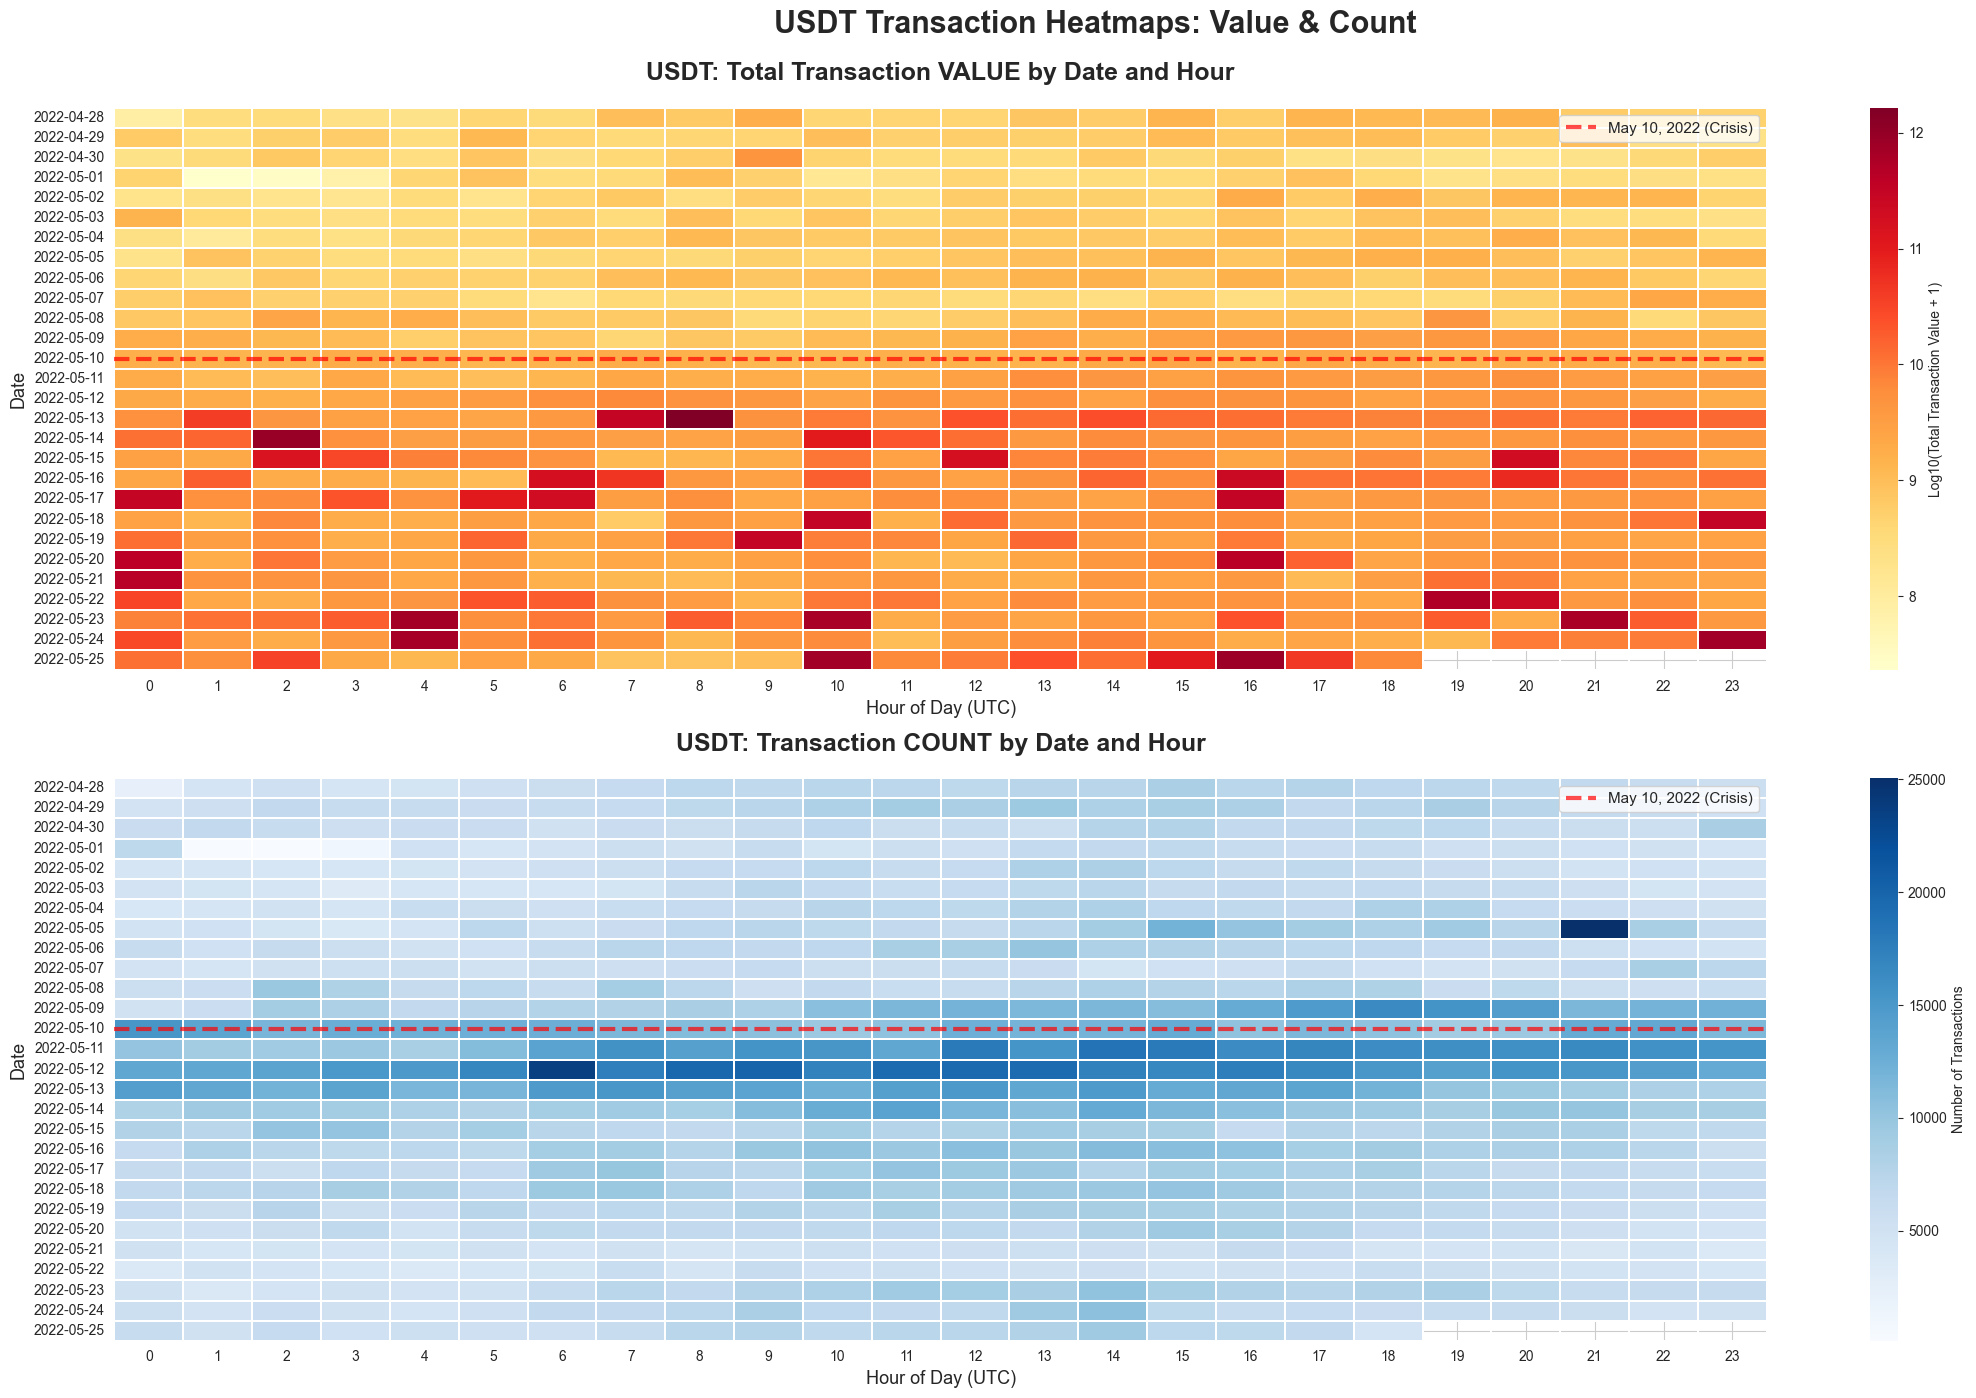


Done!


In [60]:
# ============================================================================
# CONFIGURATION - UPDATE THIS WITH YOUR USDT TRANSFER FILE
# ============================================================================
DATA_FILE = '../data/token_transfers.csv'  # <-- PUT YOUR USDT TRANSFER FILE HERE
CRISIS_DATE = '2022-05-10'
# ============================================================================

print("Loading USDT transfer data...")
df = pd.read_csv(DATA_FILE)

# Prepare data
df['datetime'] = pd.to_datetime(df['time_stamp'], unit='s')
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df = df[df['value'] > 0].copy()
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour

print(f"✓ Loaded {len(df):,} transactions")
print(f"✓ Date range: {df['datetime'].min()} to {df['datetime'].max()}")

# Aggregate data by date and hour
print("\nAggregating data...")
agg_data = df.groupby(['date', 'hour'])['value'].agg(['sum', 'count']).reset_index()

# Create pivot tables
pivot_sum = agg_data.pivot(index='date', columns='hour', values='sum')
pivot_count = agg_data.pivot(index='date', columns='hour', values='count')

print(f"✓ Created heatmap data: {len(pivot_sum)} days x 24 hours")

# Create the 2-panel heatmap
fig, axes = plt.subplots(2, 1, figsize=(22, 14))

# Heatmap 1: Transaction VALUE (sum)
sns.heatmap(np.log10(pivot_sum + 1), 
            cmap='YlOrRd',
            cbar_kws={'label': 'Log10(Total Transaction Value + 1)'},
            ax=axes[0],
            linewidths=0.1)
axes[0].set_title('USDT: Total Transaction VALUE by Date and Hour', 
                  fontsize=18, fontweight='bold', pad=20)
axes[0].set_xlabel('Hour of Day (UTC)', fontsize=13)
axes[0].set_ylabel('Date', fontsize=13)

# Heatmap 2: Transaction COUNT
sns.heatmap(pivot_count, 
            cmap='Blues',
            cbar_kws={'label': 'Number of Transactions'},
            ax=axes[1],
            linewidths=0.1)
axes[1].set_title('USDT: Transaction COUNT by Date and Hour', 
                  fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Hour of Day (UTC)', fontsize=13)
axes[1].set_ylabel('Date', fontsize=13)

# Add crisis date marker if it exists in the data
crisis_dt = pd.to_datetime(CRISIS_DATE).date()
if crisis_dt in pivot_sum.index:
    crisis_idx = list(pivot_sum.index).index(crisis_dt)
    for ax in axes:
        ax.axhline(y=crisis_idx + 0.5, color='red', linestyle='--', 
                   linewidth=3, alpha=0.7, label='May 10, 2022 (Crisis)')
        ax.legend(loc='upper right', fontsize=11)

plt.suptitle('USDT Transaction Heatmaps: Value & Count', 
             fontsize=22, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('usdt_heatmap_2panel.png', dpi=300, bbox_inches='tight')

print("\n" + "="*60)
print("✓ Heatmap saved as: usdt_heatmap_2panel.png")
print("="*60)

# Print summary stats
print("\nSUMMARY STATISTICS:")
print(f"Total transactions: {df['value'].count():,}")
print(f"Total value: {df['value'].sum():,.2f}")
print(f"Average transaction value: {df['value'].mean():,.2f}")
print(f"Median transaction value: {df['value'].median():,.2f}")
print(f"Peak volume day: {df.groupby('date')['value'].sum().idxmax()}")
print(f"Peak transaction count day: {df.groupby('date')['value'].count().idxmax()}")
print(f"Peak hour (by volume): {df.groupby('hour')['value'].sum().idxmax()}:00")
print(f"Peak hour (by count): {df.groupby('hour')['value'].count().idxmax()}:00")
print("="*60)

plt.show()
print("\nDone!")